In [105]:
import torch
from vae.vae_pl import ModalVAE
from fomo.dataset import MultiModalDatasets
from torch.utils.data import DataLoader
import pytorch_lightning as pl
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [106]:
test_data = MultiModalDatasets('/data/compoundx/anand/benchmark-dataset/', split_type = "test", xs_list = ["age","laicum"])

model = ModalVAE.load_from_checkpoint("/data/compoundx/anand/fomo-vaem/grouped_weather/lightning_logs/version_0/checkpoints/epoch=199-step=100000.ckpt", map_location=torch.device("cpu"), inp_shape=(1,36,3), modality="grouped_weather", beta=0.0001, batch_size=16)

In [107]:
trainer = pl.Trainer()

/home/anand/.conda/envs/TORCH311/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/anand/.conda/envs/TORCH311/lib/python3.11/site ...
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [108]:
out = trainer.predict(model, DataLoader(test_data, batch_size=64))

Missing logger folder: /gpfs1/schlecker/home/anand/Projects/FOMO-VAEM/lightning_logs
/home/anand/.conda/envs/TORCH311/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting DataLoader 0: 100%|██████████| 250/250 [00:03<00:00, 75.61it/s]


In [109]:
r_list = []
x_list = []
mu_list = []
log_var_list = []
for each in out:
    r, x, mu, log_var = each
    r_list.append(r)
    x_list.append(x)
    mu_list.append(mu)
    log_var_list.append(log_var)  

r = np.vstack(r_list)
x = np.vstack(x_list)
mu = np.vstack(mu_list)
log_var = np.vstack(log_var_list)

In [110]:
log_var.shape

(15994, 8)

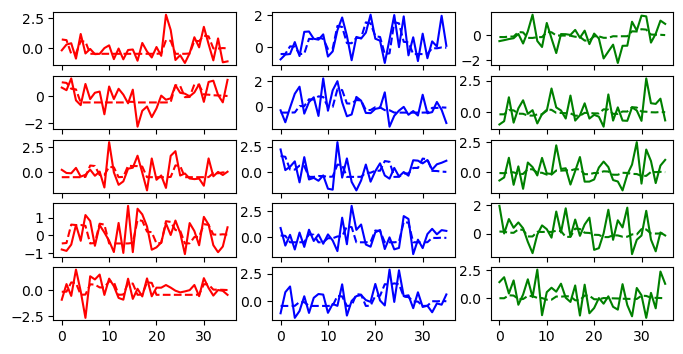

In [111]:
row, col = 5 , 3

fig = plt.figure(figsize=(8,4))

gs = gridspec.GridSpec(row, col, figure=fig)

for i in range(row):
    rand_index = np.random.randint(0, r.shape[0])
    color = ["r", "b", "g"]
    for var_i in range(3):
        ax = fig.add_subplot(gs[i, var_i])

        ax.plot(x[rand_index, 0, :, var_i], color=color[var_i])
        ax.plot(r[rand_index, 0, :, var_i], color=color[var_i], linestyle="--")



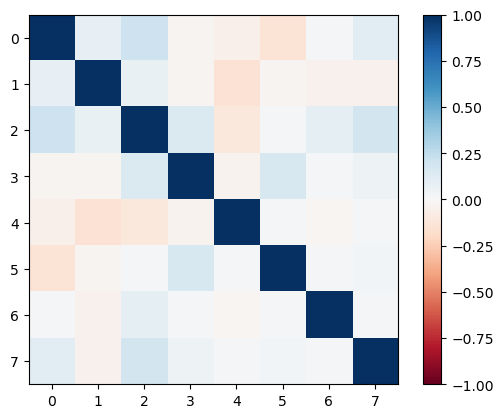

In [112]:
corr = np.corrcoef(mu.T)
plt.imshow(corr, vmin=-1, vmax=1, cmap="RdBu")
plt.colorbar()
plt.show()

In [121]:
model = ModalVAE.load_from_checkpoint("/data/compoundx/anand/fomo-vaem/grouped_states/lightning_logs/version_3/checkpoints/epoch=199-step=100000.ckpt", map_location=torch.device("cpu"), inp_shape=(1,104,2), modality="grouped_states", beta=0.0001, batch_size=16)

In [122]:
out = trainer.predict(model, DataLoader(test_data, batch_size=64))

Predicting DataLoader 0:   0%|          | 0/250 [00:00<?, ?it/s]

Predicting DataLoader 0: 100%|██████████| 250/250 [00:05<00:00, 46.32it/s]


In [123]:
r_list = []
x_list = []
mu_list = []
log_var_list = []
for each in out:
    r, x, mu, log_var = each
    r_list.append(r)
    x_list.append(x)
    mu_list.append(mu)
    log_var_list.append(log_var)  

r = np.vstack(r_list)
x = np.vstack(x_list)
mu = np.vstack(mu_list)
log_var = np.vstack(log_var_list)

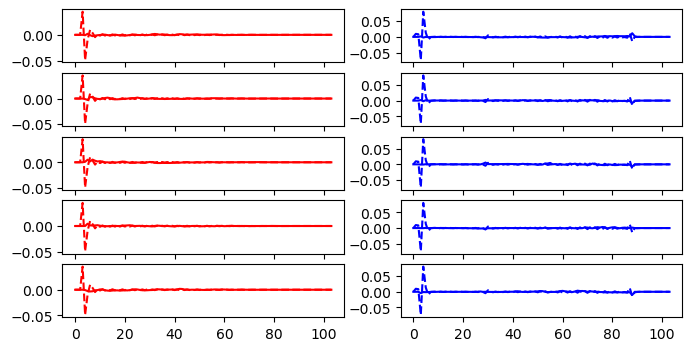

In [124]:
row, col = 5 , 2

fig = plt.figure(figsize=(8,4))

gs = gridspec.GridSpec(row, col, figure=fig)

for i in range(row):
    rand_index = np.random.randint(0, r.shape[0])
    color = ["r", "b", "g"]
    for var_i in range(2):
        ax = fig.add_subplot(gs[i, var_i])

        ax.plot(x[rand_index, 0, :, var_i] -x[:, 0, :, var_i].mean(axis=0) , color=color[var_i])
        ax.plot(r[rand_index, 0, :, var_i] -x[:, 0, :, var_i].mean(axis=0) , color=color[var_i], linestyle="--")


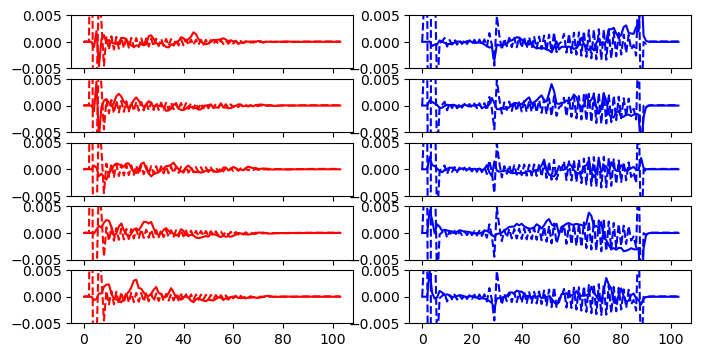

In [125]:
row, col = 5 , 2

fig = plt.figure(figsize=(8,4))

gs = gridspec.GridSpec(row, col, figure=fig)

for i in range(row):
    rand_index = np.random.randint(0, r.shape[0])
    color = ["r", "b", "g"]
    for var_i in range(2):
        ax = fig.add_subplot(gs[i, var_i])

        ax.plot(x[rand_index, 0, :, var_i] -x[:, 0, :, var_i].mean(axis=0) , color=color[var_i])
        ax.plot(r[rand_index, 0, :, var_i] -x[:, 0, :, var_i].mean(axis=0) , color=color[var_i], linestyle="--")
        ax.set_ylim(-0.005,0.005)



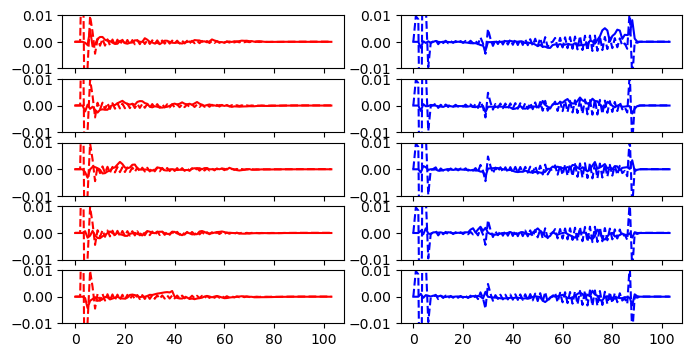

In [126]:
row, col = 5 , 2

fig = plt.figure(figsize=(8,4))

gs = gridspec.GridSpec(row, col, figure=fig)

for i in range(row):
    rand_index = np.random.randint(0, r.shape[0])
    color = ["r", "b", "g"]
    for var_i in range(2):
        ax = fig.add_subplot(gs[i, var_i])

        ax.plot(x[rand_index, 0, :, var_i] -x[:, 0, :, var_i].mean(axis=0) , color=color[var_i])
        ax.plot(r[rand_index, 0, :, var_i] -x[:, 0, :, var_i].mean(axis=0) , color=color[var_i], linestyle="--")
        ax.set_ylim(-0.01,0.01)

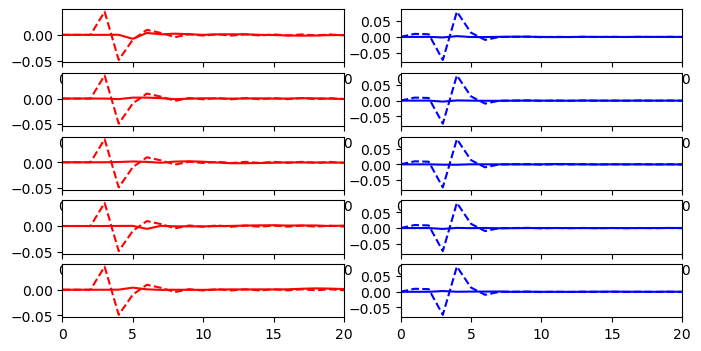

In [127]:
row, col = 5 , 2

fig = plt.figure(figsize=(8,4))

gs = gridspec.GridSpec(row, col, figure=fig)

for i in range(row):
    rand_index = np.random.randint(0, r.shape[0])
    color = ["r", "b", "g"]
    for var_i in range(2):
        ax = fig.add_subplot(gs[i, var_i])

        ax.plot(x[rand_index, 0, :, var_i] -x[:, 0, :, var_i].mean(axis=0) , color=color[var_i])
        ax.plot(r[rand_index, 0, :, var_i] -x[:, 0, :, var_i].mean(axis=0) , color=color[var_i], linestyle="--")
        ax.set_xlim(0,20)

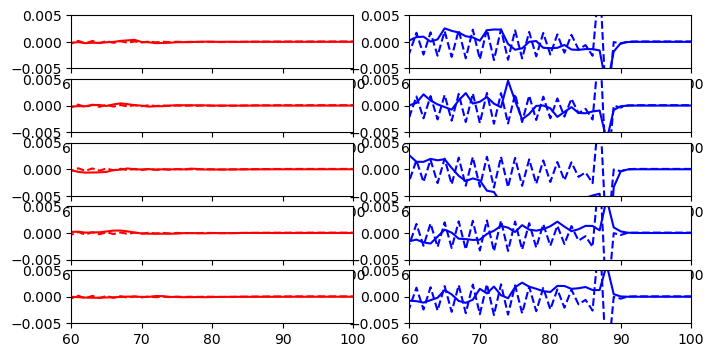

In [128]:
row, col = 5 , 2

fig = plt.figure(figsize=(8,4))

gs = gridspec.GridSpec(row, col, figure=fig)

for i in range(row):
    rand_index = np.random.randint(0, r.shape[0])
    color = ["r", "b", "g"]
    for var_i in range(2):
        ax = fig.add_subplot(gs[i, var_i])

        ax.plot(x[rand_index, 0, :, var_i] -x[:, 0, :, var_i].mean(axis=0) , color=color[var_i])
        ax.plot(r[rand_index, 0, :, var_i] -x[:, 0, :, var_i].mean(axis=0) , color=color[var_i], linestyle="--")
        ax.set_xlim(60,100)
        ax.set_ylim(-0.005,0.005)


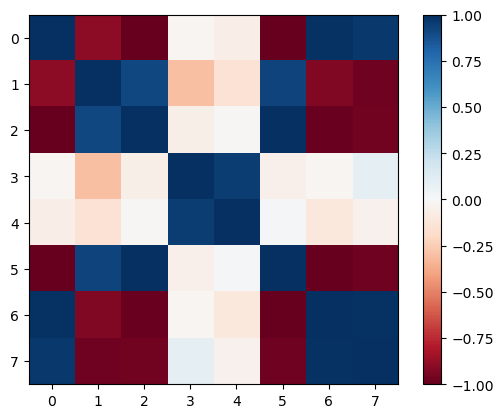

In [129]:
corr = np.corrcoef(mu.T)
plt.imshow(corr, vmin=-1, vmax=1, cmap="RdBu")
plt.colorbar()
plt.show()